In [1]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
%matplotlib inline

In [3]:
raw_data = pd.read_csv('C:/Users/user/Desktop/DataScienceML/files/project/archive (1).zip/raw_data.csv')

In [4]:
transformed_data = pd.read_csv('C:/Users/user/Desktop/DataScienceML/files/project/archive (1).zip/transformed_data.csv')

In [5]:
raw_data.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [6]:
transformed_data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
raw_data.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139,15.442097
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902,2.495039
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000,6.695799
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000,14.151619
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000,15.929201
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000,17.187513
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,21.087439


In [8]:
transformed_data.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [9]:
raw_data.nunique()

iso_code                     210
location                     210
date                         294
total_cases                19172
total_deaths                6374
stringency_index             170
population                   210
gdp_per_capita               184
human_development_index      157
Unnamed: 9                 19172
Unnamed: 10                 6374
Unnamed: 11                  170
Unnamed: 12                  210
Unnamed: 13                  185
dtype: int64

In [10]:
transformed_data['COUNTRY'].value_counts()#.max()

Qatar                   294
San Marino              294
United Arab Emirates    294
Macedonia               294
Russia                  294
                       ... 
Tajikistan              172
Comoros                 171
Lesotho                 158
Hong Kong                51
Solomon Islands           4
Name: COUNTRY, Length: 210, dtype: int64

In [11]:
code = transformed_data['CODE'].unique().tolist()
country = transformed_data['COUNTRY'].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = []
gdp = []


In [12]:
transformed_data.iloc[0]

CODE               AFG
COUNTRY    Afghanistan
DATE        2019-12-31
HDI              0.498
TC                   0
TD                   0
STI                  0
POP            17.4772
GDPCAP         7.49775
Name: 0, dtype: object

In [13]:
for i in country:
    hdi.append((transformed_data.loc[transformed_data['COUNTRY'] == i , 'HDI']).sum()/294)
    tc.append((raw_data.loc[raw_data['location'] == i, 'total_cases']).sum())
    td.append((raw_data.loc[raw_data['location'] == i, 'total_deaths']).sum())
    sti.append((transformed_data.loc[transformed_data['COUNTRY'] == i, 'STI']).sum()/294)
    population.append((raw_data.loc[raw_data['location'] == i, 'population']).sum()/294)

In [14]:
cleaned_data = pd.DataFrame(list(zip(code, country,hdi, tc, td, sti, population)), 
                            columns = ['Country Code', 'Country', 'HDI', 'Total Cases',
                                       'Total Deaths', 'Stringency Index', 'Population'])

In [15]:
cleaned_data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
0,AFG,Afghanistan,0.498000,5126433.0,165875.0,3.049673,3.892834e+07
1,ALB,Albania,0.600765,1071951.0,31056.0,3.005624,2.202398e+06
2,DZA,Algeria,0.754000,4893999.0,206429.0,3.195168,4.385104e+07
3,AND,Andorra,0.659551,223576.0,9850.0,2.677654,5.939418e+04
4,AGO,Angola,0.418952,304005.0,11820.0,2.965560,2.369949e+07


In [16]:
clean_data = cleaned_data.sort_values(by = ['Total Cases'], ascending = False)

In [17]:
clean_data= clean_data.head(10)

In [18]:
clean_data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.92400,746014098.0,26477574.0,3.350949,3.310026e+08
27,BRA,Brazil,0.75900,425704517.0,14340567.0,3.136028,2.125594e+08
90,IND,India,0.64000,407771615.0,7247327.0,3.610552,1.380004e+09
157,RUS,Russia,0.81600,132888951.0,2131571.0,3.380088,1.459345e+08
150,PER,Peru,0.59949,74882695.0,3020038.0,3.430126,2.635505e+07


In [19]:
clean_data['GDP Before Covid']= [65279.53, 8897.49, 2100.75, 11497.65, 7027.61, 9946.03,29564.74, 6001.40, 
                                6424.98, 42354.41]
clean_data['GDP During Covid']= [63543.58, 6796.84, 1900.71, 10126.72, 6126.87, 8346.70, 27057.16, 5090.72,
                                5332.77, 40284.64]

In [20]:
clean_data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid
200,USA,United States,0.92400,746014098.0,26477574.0,3.350949,3.310026e+08,65279.53,63543.58
27,BRA,Brazil,0.75900,425704517.0,14340567.0,3.136028,2.125594e+08,8897.49,6796.84
90,IND,India,0.64000,407771615.0,7247327.0,3.610552,1.380004e+09,2100.75,1900.71
157,RUS,Russia,0.81600,132888951.0,2131571.0,3.380088,1.459345e+08,11497.65,10126.72
150,PER,Peru,0.59949,74882695.0,3020038.0,3.430126,2.635505e+07,7027.61,6126.87


In [22]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
from chart_studio.plotly import plot, iplot as pt
from plotly.offline import download_plotlyjs,iplot, init_notebook_mode

In [24]:
import cufflinks as cf

In [25]:
#import cufflinks
cf.go_offline(connected = True)
init_notebook_mode(connected = True)

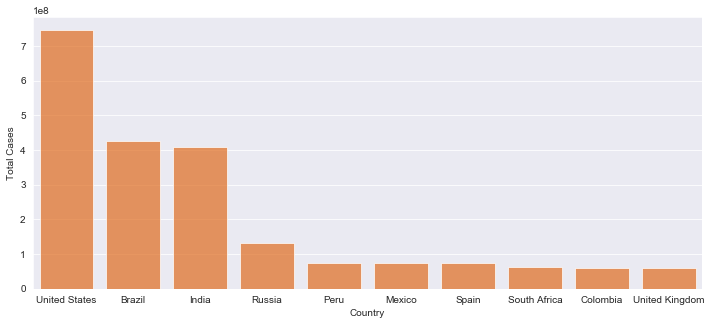

In [57]:
#figure = px.bar(clean_data, y= 'Total Cases', x= 'Country', title='Countries With Highest Covid Cases ')
plt.figure(figsize= (12, 5), facecolor= 'white')
sbs.set_style(style = 'darkgrid')
sbs.barplot(data= clean_data, x= 'Country', y= 'Total Cases', color= '#FF6600', alpha = 0.7)
plt.show()

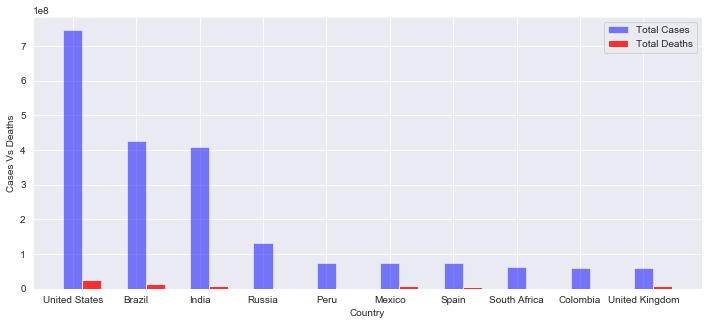

In [56]:
plt.figure(figsize= (12, 5))

n= 10
r = py.arange(n)
width= 0.3

plt.bar(x= r , height= clean_data['Total Cases'], color= 'blue', width= width, 
        label= 'Total Cases', alpha = 0.5)
plt.bar(x= r + width ,height= clean_data['Total Deaths'], color= 'red', width= width, 
        label= 'Total Deaths', alpha = 0.8 )

plt.xlabel('Country')
plt.ylabel('Cases Vs Deaths')
plt.legend()

plt.xticks(r , clean_data['Country'])
plt.show()

In [28]:
fig = px.bar(clean_data, x= 'Country', y= 'Total Cases',
       title='Countries With Highest COVID Cases')
fig.show()

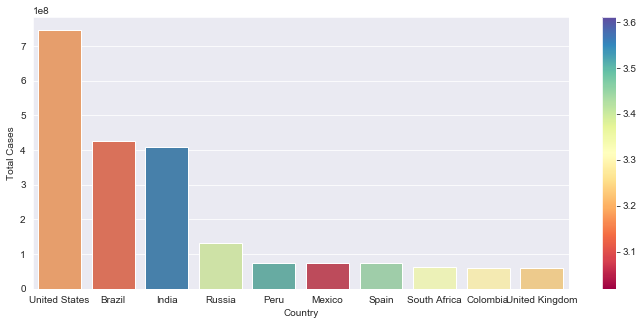

In [55]:
#sti_norm= [x / (clean_data['Stringency Index'].max()) for x in clean_data['Stringency Index]]
fig = plt.figure(figsize= (12,5))
#my_cmap= plt.cm.get_cmap('rainbow')
#color= my_cmap(sti_norm)
norm= plt.Normalize(clean_data['Stringency Index'].min(), clean_data['Stringency Index'].max())
sm = plt.cm.ScalarMappable(cmap= 'Spectral',norm= norm)
sm.set_array([])
                                                                          
chart= sbs.barplot(x= clean_data['Country'], y= clean_data['Total Cases'],
                   hue= clean_data['Stringency Index'], palette= 'Spectral', dodge = False)
#cbar.set_label('Stringency Index', rotation= 270, labelpad= 25)
chart.figure.colorbar(sm)
chart.get_legend().remove()
#plt.xticks=(clean_data['Country'])
plt.show()

In [30]:
clean_data

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,3.310026e+08,65279.53,63543.58
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,2.125594e+08,8897.49,6796.84
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,1.380004e+09,2100.75,1900.71
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,1.459345e+08,11497.65,10126.72
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,2.635505e+07,7027.61,6126.87
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,1.289328e+08,9946.03,8346.70
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,4.659575e+07,29564.74,27057.16
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,5.164294e+07,6001.40,5090.72
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,3.963327e+07,6424.98,5332.77
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,6.788600e+07,42354.41,40284.64


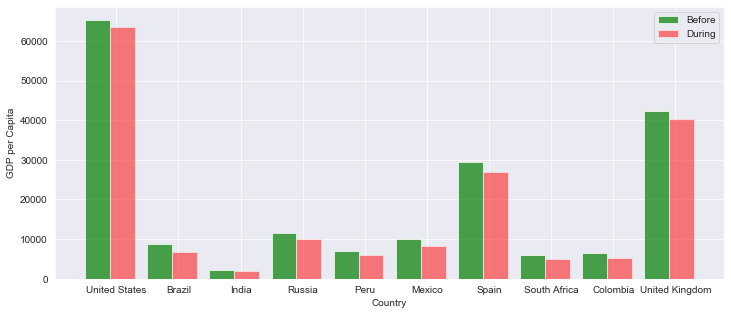

In [54]:
fig = plt.figure(figsize= (12,5))
n= 10
r = py.arange(10)
width_1= 0.3
width_2= 0.1

plt.bar(x= r - width_1, height= 'GDP Before Covid', data= clean_data, width= 0.4,
       color= 'green', alpha= 0.7, label= 'Before')
plt.bar(x= r + width_2, height= 'GDP During Covid', data= clean_data, width= 0.4
        ,color = 'red', alpha= 0.5, label= 'During')

plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.legend()
plt.xticks(r, clean_data['Country'])
plt.show()

In [58]:
pwd

'C:\\Users\\user'